In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Name of the model
nome = "nosint-sel"
model_dir = f"modelli/{nome}"

In [64]:
# Import validation data on the fine-tuning phase
try:
    with open(f"{model_dir}/val_loss_tune.txt", "r") as f:
        fineV_loss = [float(line.strip()) for line in f.readlines()]
        
    with open(f"{model_dir}/val_acc_tune.txt", "r") as f:
        fineV_acc = [float(line.strip()) for line in f.readlines()]
    
except:
    print("Fine-tuning data not found.")

In [65]:
# Import validation data on the training phase
try:
    with open(f"{model_dir}/val_loss.txt", "r") as f:
        val_loss = [float(line.strip()) for line in f.readlines()]
        
    with open(f"{model_dir}/val_acc.txt", "r") as f:
        val_acc = [float(line.strip()) for line in f.readlines()]
    
except:
    print("Validation data not found.")

## Plotting loss and accuracy during fine-tuning

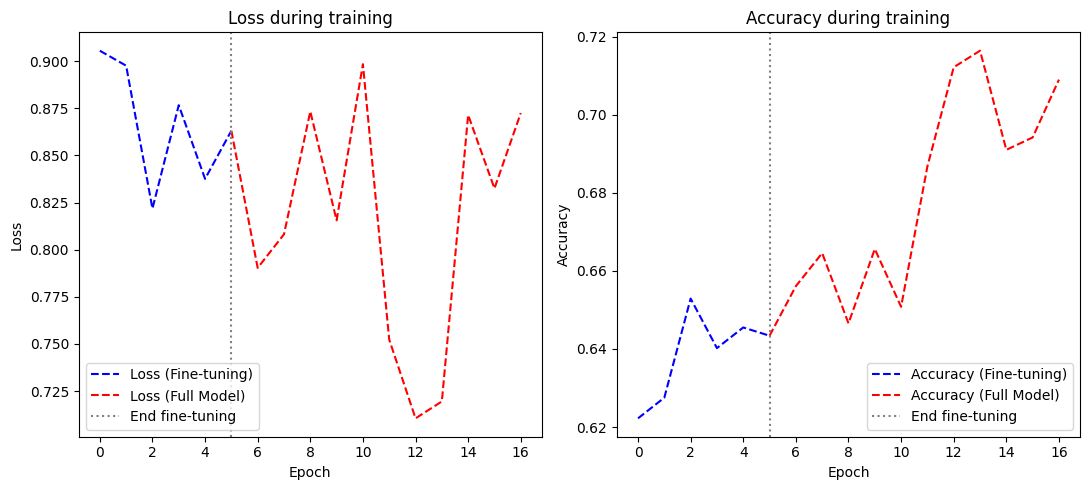

In [66]:
all_loss = fineV_loss + val_loss
all_acc = fineV_acc + val_acc
fig, ax = plt.subplots(1, 2, figsize=(11, 5))

# Epochs and split point
total_epochs = len(all_loss)
x = range(total_epochs)
split_point = len(val_loss)

# Loss plot
ax[0].plot(x[:split_point], all_loss[:split_point], color='blue', linestyle='--', label='Loss (Fine-tuning)')
ax[0].plot(x[split_point-1:], all_loss[split_point-1:], color='red', linestyle='--', label='Loss (Full Model)')

# Vertical line
ax[0].axvline(x=split_point - 1, color='gray', linestyle=':', label='End fine-tuning')

# Labels and title
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss during training')
ax[0].legend()

# Accuracy plot
ax[1].plot(x[:split_point], all_acc[:split_point], color='blue', linestyle='--', label='Accuracy (Fine-tuning)')
ax[1].plot(x[split_point-1:], all_acc[split_point-1:], color='red', linestyle='--', label='Accuracy (Full Model)')

# Vertical line
ax[1].axvline(x=split_point - 1, color='gray', linestyle=':', label='End fine-tuning')

# Labels and title
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy during training')
ax[1].legend()

fig.tight_layout()
plt.show()